# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [2]:
!pip install scipy==1.2 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.6 MB 33.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.2.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.2.0 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.2.0 which is incompatible.
jax 0.3.23 requires scipy>=1.5, but you have scipy 1.2.0 which is incompatible.
aeppl 0.0.33 requires scipy>=1.4.0, but you have scipy 1.2.0 which is incompatible.


### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importe o dataset

In [8]:
dados = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [9]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [19]:
dados.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [14]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,365.0,25401.367123,4399.142703,14343.0,22008.00,24867.00,28631.00,37937.00
X,365.0,21.226356,3.180108,12.9,19.02,21.38,23.28,28.86


### Análise gráfica
### Construa um box plot para cada variável do dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


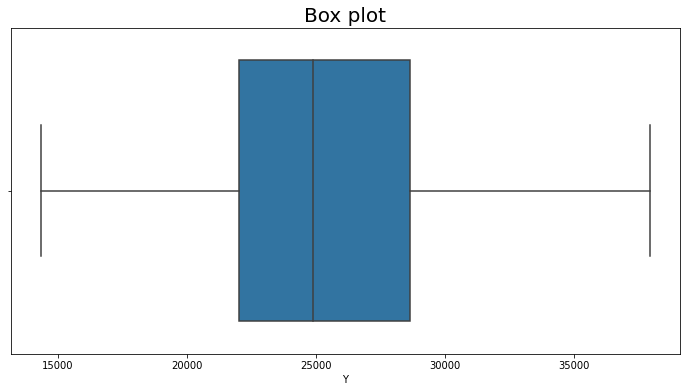

In [24]:
ax = sns.boxplot(dados['Y'])
ax.set_title('Box plot', fontsize=20)
ax.figure.set_size_inches(12, 6)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


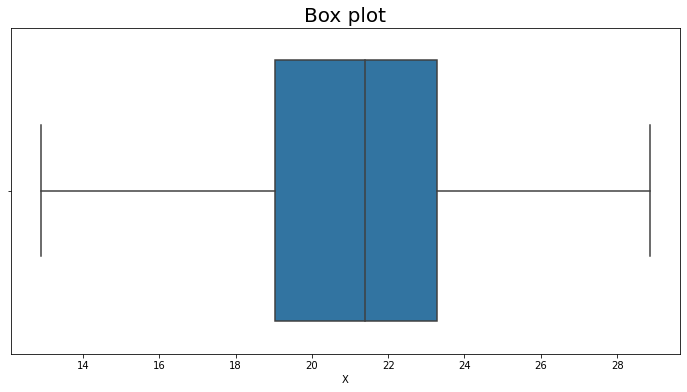

In [25]:
ax = sns.boxplot(dados['X'])
ax.set_title('Box plot', fontsize=20)
ax.figure.set_size_inches(12, 6)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

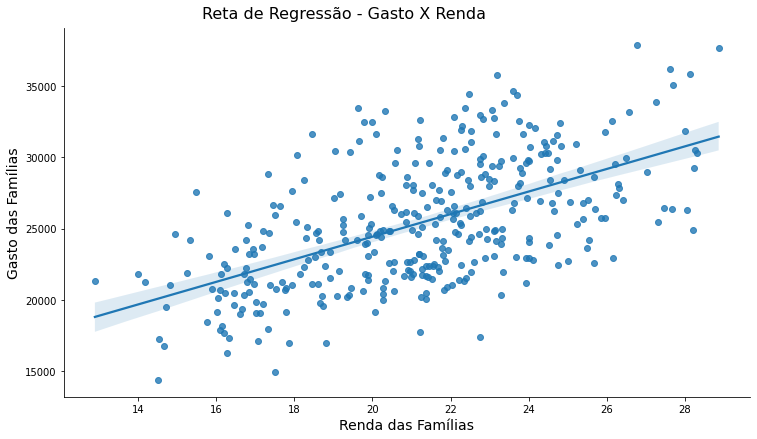

In [26]:
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [27]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.:

É possível quantificar a intensidade dessa relação?

Resp.:

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.:

### Prepare os dados para estimar um modelo de regressão linear simples

In [28]:
Y = dados.Y
X = sm.add_constant(dados.X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Estime o modelo de regressão linear simples

In [29]:
reg = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [30]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.87e-33
Time:                        11:05:07   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [31]:
dados['y_pred'] = reg.predict()
dados.head()

,Y,X,y_pred
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [32]:
reg.predict([1, 42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [33]:
dados['Residuos'] = reg.resid
dados.head()

,Y,X,y_pred,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

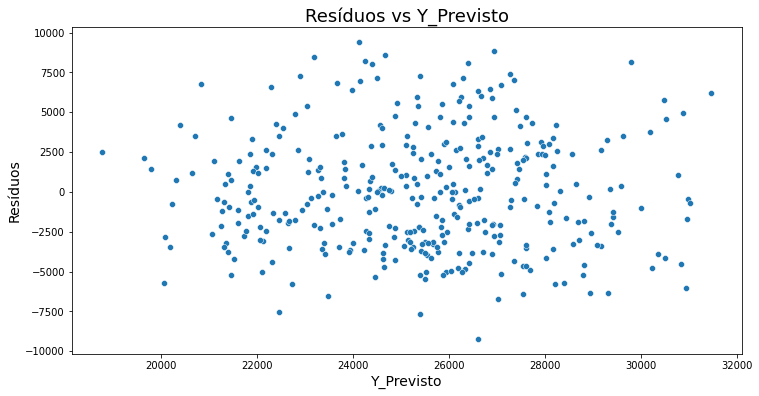

In [34]:
ax = sns.scatterplot(x=dados.y_pred, y=dados.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Obtenha o QQPlot dos resíduos

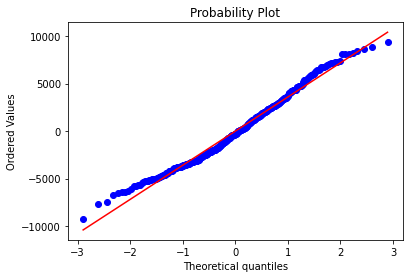

In [35]:
(_, (_, _, _)) = probplot(dados.Residuos, plot=plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [36]:
SQE = reg.ssr
SQE

4718394688.067693

In [37]:
SQR = reg.ess
SQR

2325899486.7377863

In [38]:
SQT = SQR + SQE
SQT

7044294174.805479

In [40]:
R2 = SQR / SQT
R2

0.33018204933243206

In [41]:
reg.rsquared

0.330182049332432